# Introducción a Opencv
<ul>
<li><a href='#que_es'>Que es Opencv?</a></li>
<li><a href='#instalacion'>Instalación</a></li>
<li><a href='#hello'>Hello Opencv</a></li>
<li><a href='#modulos'>Módulos principales</a></li>
<li><a href='#caras'>Detección de caras</a></li>
<li><a href='#tracking'>Siguiendo un objeto basándonos en su color</a></li>
</ul>

<a id='que_es'></a>
## Que es Opencv?


<a href="http://opencv.org/">OpenCV</a>  es la libreria de referencia para el procesamiento de imagenes.

* **Historia**
  * El proyecto OpenCV fue iniciado por Gary Bradsky el año 1999 en el seno de la empresa Intel. La primera versión fue lanzada en el congreso Computer Vision and Pattern Recognition el año 2000. 
  * Entre 2001 y 2005 cinco betas fueron liberadas, a partir de ese año su .
  * El año 2008, OpenCV obtuvo soporte de Willow Garage, y se reanudó su desarrollo, bloquedado años antes. Se lanzó una versión 1.1 "pre-release".
  * ** El mes de octubre del año 2008 se lanzó la segunda versión de Opencv 2.0. Esta versión incluye grandes cambios en el wrapper C++**
  * El mes de  Agosto de 2012, el control de OpenCV fue asumido por una fundación sin ánimos de lucro: OpenCV.org, que mantiene su desarrollo.
    

* **Características**
  * OpenCV-Python es un wrapper de OpenCV que trabaja sobre la implementación C++. Esto nos proporciona una ventaja:
    * El código es tan rápido como la implementación de C/C++ (since it is the actual C++ code working in background).
  * Todas las estructuras de datos de OpenCV se convierten a-y-desde estructuras Numpy.
  * Otras bibliotecas como SciPy o Matplotlib que trabajan con las estructuras que nos proporciona Numpy se pueden utilizar con Opencv.
  * OpenCV-Python es una herramienta adecuada para el prototipado rápido de problemas de visión por computador.
 




<a id='instalacion'></a>

## Instalación

conda install -c https://conda.binstar.org/menpo opencv3

Instalar con todas las funcionalidades: http://www.pyimagesearch.com/2015/06/22/install-opencv-3-0-and-python-2-7-on-ubuntu/


In [2]:
%matplotlib inline

import cv2
import time
import numpy as np
from IPython import display
import matplotlib.pyplot as plt

<a id='hello'></a>
## Hello Opencv

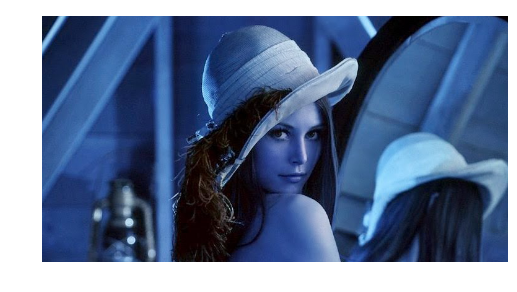

In [3]:
fig,ax = plt.subplots(1,1)
ax.set_axis_off()

im = cv2.imread("lena.jpg") # Images are loaded as BGR
plt.imshow(im)
plt.show()

In [4]:
# Image characteristics from numpy ndarrays
print(im.shape)
print(im.dtype) 

(399, 752, 3)
uint8


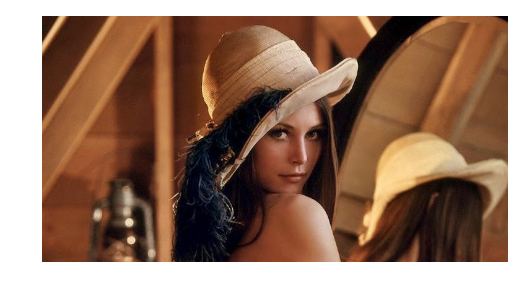

In [5]:
fig,ax = plt.subplots(1,1)
ax.set_axis_off()

# Splitting image channels. Mixing Opencv with Numpy functions and structures.
b, g, r = cv2.split(im)
im[:,:,0] = r
im[:,:,2] = b
plt.imshow(im)
plt.show()

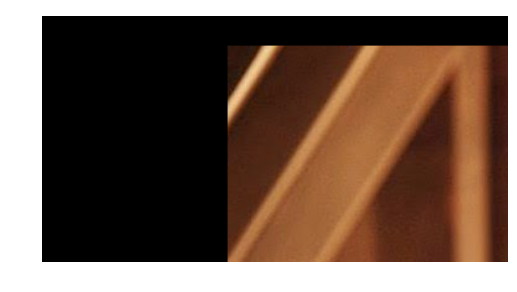

In [8]:
fig,ax = plt.subplots(1,1)
ax.set_axis_off()

#Simple image transformations.

#height, width = im.shape[:2]
#res = cv2.resize(im,(12*width, 12*height), interpolation = cv2.INTER_CUBIC)

rows,cols = im.shape[:2]
M = np.float32([[2,0,300],[0,2,50]])
res = cv2.warpAffine(im,M,(cols,rows))

plt.imshow(res)
plt.show()

<img style="height:800px;" src="https://upload.wikimedia.org/wikipedia/commons/2/2c/2D_affine_transformation_matrix.svg"/ >

<a id='modulos'></a>

## Módulos principales:

* **core**. Core functionality - Define las estructuras de datos
* **imgproc.** Image processing - Filtros, histogramas, transformaciones y detección de características (ej: bordes).
* **imgcodecs.** Lectura y escritura de imagenes.
* **videoio.** Media I/O, captura de archivos de vídeo, webcams o streams de diversa índole.
* ~~**highgui.**  GUI~~*
* **video.** Análisis de video - Flujo óptico, eliminación de fondo o técnicas deseguimiento.
* **calib3d.** Calibración de cámaras y reconstrucción 3D.
* **features2d.** Detección de esquinas y detección de puntos clave.
* **objdetect**. Detección de objetos y clasificadores en cascada.
* ~~**ml**. Machine Learning: SVM, Normal Bayes Classifier, K-Nearest Neighbors, Regressions ...~~*

*_Opinión personal_

<a id='caras'></a>
## Detección de caras 
* Paul Viola and Michael J. Jones. [Rapid Object Detection using a Boosted Cascade of Simple Features](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf). IEEE CVPR, 2001. 

In [9]:
im_face = cv2.imread("pycon.jpg") # Images are loaded as BGR

#File with weak features
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
gray = cv2.cvtColor(im_face, cv2.COLOR_BGR2GRAY)

# Face detector 
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(25, 25))



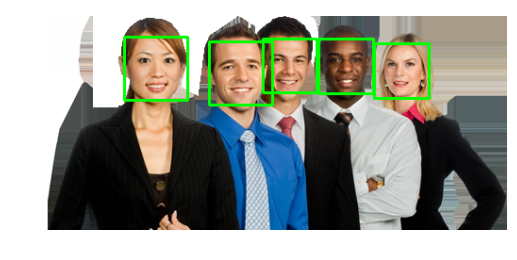

In [11]:
fig,ax = plt.subplots(1,1)
ax.set_axis_off()

im_face = cv2.cvtColor(im_face, cv2.COLOR_BGR2RGB)

# Draw a rectangle around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(im_face, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(im_face)
plt.show()

<a id='tracking'></a>
## Siguiendo un objeto basándonos en su color

* CamShift: Bradski, G.R., [Real time face and object tracking as a component of a perceptual user interface](http://opencv.jp/opencv-1.0.0_org/docs/papers/camshift.pdf) Applications of Computer Vision, 1998. WACV '98. Proceedings., Fourth IEEE Workshop on , vol., no., pp.214,219, 19-21 Oct 1998

In [ ]:
step = 1
path = "smb_dark/"
str_step = "%05d" % step

frame = cv2.imread(path + str_step+ ".jpg")

# setup initial location of window
# r,h,c,w - region of image
c,w,r,h = 240,20, 310, 5
track_window = (c,r, w, h)

# Definition of ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)


In [ ]:
#Histogram of ROI
roi_hist = cv2.calcHist([hsv_roi],[0], None ,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX);

In [ ]:
#Histogram plotting
h_channel = roi[:,:,0]

cm = plt.cm.get_cmap('hsv')

# Plot histogram.
n, bins, patches = plt.hist(h_channel.ravel(),180,[0,180], normed= True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.show()

In [ ]:
# Termination criteria, either 10 iteration or move by at least 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 ) 
fig,ax = plt.subplots(1,1)
ax.set_axis_off()

while step < 100:
    step += 1
    str_step = "%05d" % step
    frame = cv2.imread(path + str_step+ ".jpg")

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180], 1)

    # apply meanshift to get the new location
    ret, track_window = cv2.CamShift(dst, track_window, term_crit)
    # Draw it on image
    pts = cv2.boxPoints(ret)
    pts = np.int0(pts)
    img2 = cv2.polylines(frame, [pts], True, 255, 2)

    
    plt.imshow(dst)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)

plt.close()

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('hJg7ik4x95U')